In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook


import warnings
warnings.filterwarnings('ignore')

import os
import datetime

import pandas_profiling

In [24]:
data = pd.read_csv('FitBit data.csv')

In [25]:
data.shape

(457, 15)

In [26]:
data.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [27]:
data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [28]:
data1 = data.copy()

In [29]:
data1['ActivityDate'].unique()

array(['3/25/2016', '3/26/2016', '3/27/2016', '3/28/2016', '3/29/2016',
       '3/30/2016', '3/31/2016', '4/1/2016', '4/2/2016', '4/3/2016',
       '4/4/2016', '4/5/2016', '4/6/2016', '4/7/2016', '4/8/2016',
       '4/9/2016', '4/10/2016', '4/11/2016', '4/12/2016', '3/12/2016',
       '3/13/2016', '3/14/2016', '3/15/2016', '3/16/2016', '3/17/2016',
       '3/18/2016', '3/19/2016', '3/20/2016', '3/21/2016', '3/22/2016',
       '3/23/2016', '3/24/2016'], dtype=object)

In [30]:
data1['ActivityDate'].head()

0    3/25/2016
1    3/26/2016
2    3/27/2016
3    3/28/2016
4    3/29/2016
Name: ActivityDate, dtype: object

In [31]:
# adding the year, month and day columns to dataset
data1['year'] = pd.DatetimeIndex(data1['ActivityDate']).year
data1['month'] = pd.DatetimeIndex(data1['ActivityDate']).month
data1['date'] = pd.DatetimeIndex(data1['ActivityDate']).day

In [32]:
data1.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,year,month,date
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,2016,3,25
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,2016,3,26
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,2016,3,27
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,2016,3,28
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,2016,3,29


In [33]:
data1 = data1.drop(['TrackerDistance'], axis=1)

In [34]:
data1.head()

,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,year,month,date
0,1503960366,3/25/2016,11004,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,2016,3,25
1,1503960366,3/26/2016,17609,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,2016,3,26
2,1503960366,3/27/2016,12736,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,2016,3,27
3,1503960366,3/28/2016,13231,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,2016,3,28
4,1503960366,3/29/2016,12041,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,2016,3,29


### Groupby the day of the month and make a boxplot of calories burnt


<IPython.core.display.Javascript object>


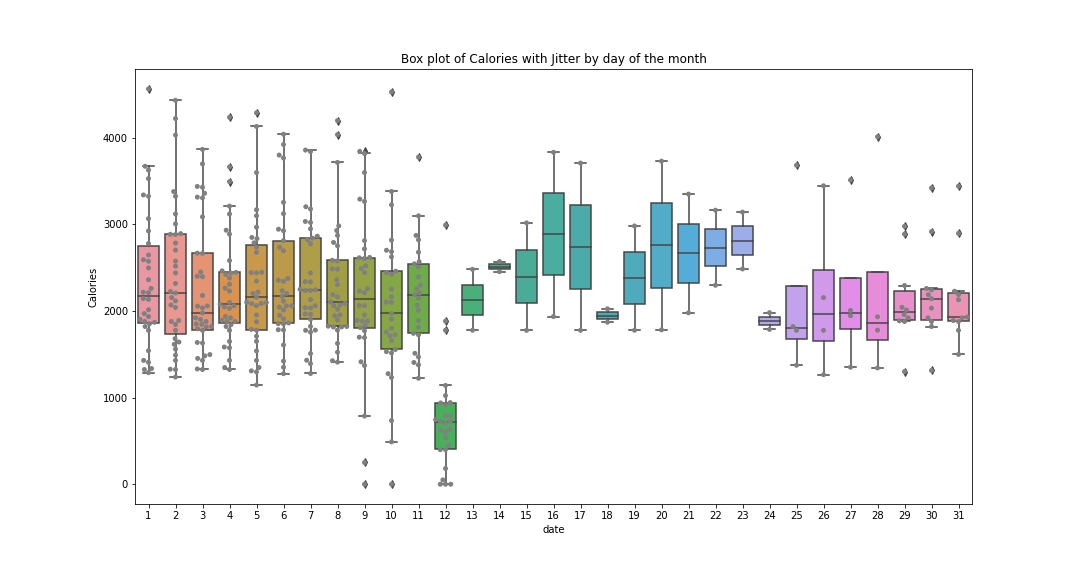

Text(0.5, 1.0, 'Box plot of Calories with Jitter by day of the month')

In [35]:
plt.figure(figsize=(15,8))

ax = sns.boxplot(x='date', y='Calories', data=data1)

ax = sns.swarmplot(x='date', y='Calories', data=data1, color='grey')

ax.set_title('Box plot of Calories with Jitter by day of the month')



### Converting the datatype to datetime

In [36]:
#activity1['Week'] = pd.to_datetime(activity1.ActivityDate).dt.week

data1['Week'] = pd.to_datetime(data1.ActivityDate).dt.isocalendar().week  #Series.dt.isocalendar().week
data1['Year'] = pd.to_datetime(data1.ActivityDate).dt.isocalendar().year

In [37]:
data1.head()

,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,year,month,date,Week,Year
0,1503960366,3/25/2016,11004,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,2016,3,25,12,2016
1,1503960366,3/26/2016,17609,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,2016,3,26,12,2016
2,1503960366,3/27/2016,12736,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,2016,3,27,12,2016
3,1503960366,3/28/2016,13231,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,2016,3,28,13,2016
4,1503960366,3/29/2016,12041,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,2016,3,29,13,2016


In [38]:
data1.ActivityDate.dtype

dtype('O')

In [39]:
# Converting ActivityDate to datetime
data1['ActivityDate'] = pd.to_datetime(data1['ActivityDate'])

In [40]:
data1['day'] = data1['ActivityDate'].dt.day_name()

In [41]:
data1.head()

,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,year,month,date,Week,Year,day
0,1503960366,2016-03-25,11004,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,2016,3,25,12,2016,Friday
1,1503960366,2016-03-26,17609,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,2016,3,26,12,2016,Saturday
2,1503960366,2016-03-27,12736,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,2016,3,27,12,2016,Sunday
3,1503960366,2016-03-28,13231,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,2016,3,28,13,2016,Monday
4,1503960366,2016-03-29,12041,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,2016,3,29,13,2016,Tuesday


<IPython.core.display.Javascript object>


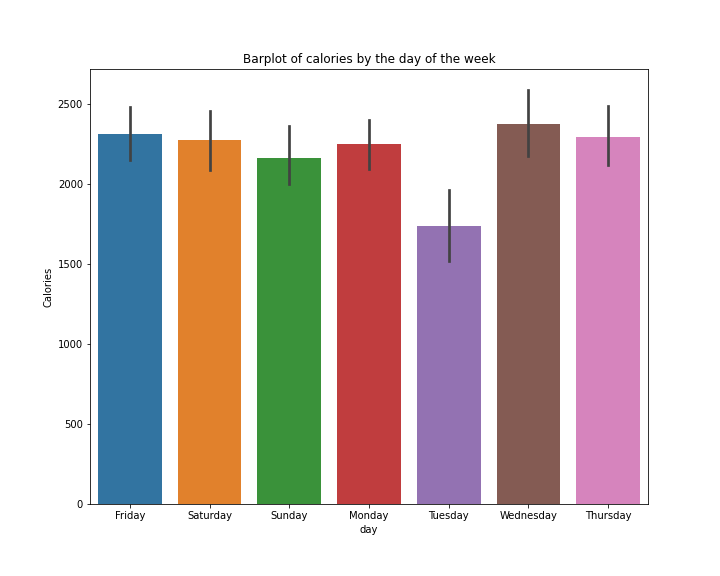

Text(0.5, 1.0, 'Barplot of calories by the day of the week')

In [42]:
plt.figure(figsize=(10,8))

#simple barplot
ax = sns.barplot(x='day', y='Calories', data=data1)

ax.set_title('Barplot of calories by the day of the week')

<IPython.core.display.Javascript object>


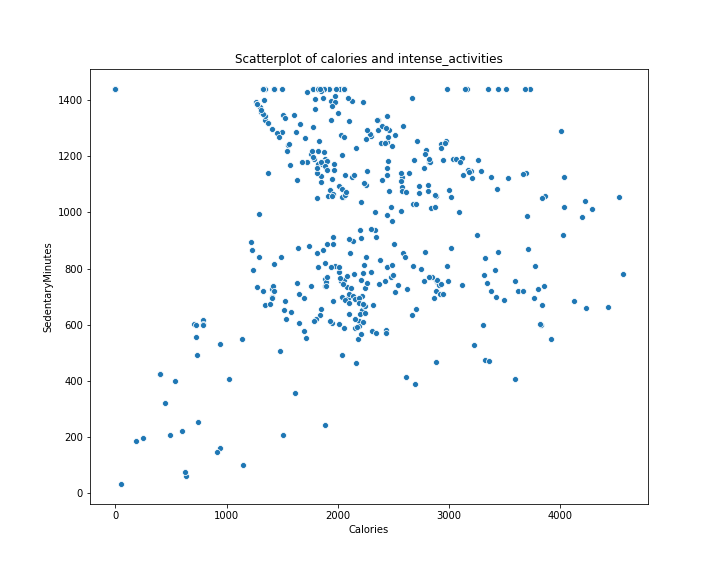

Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

In [43]:
plt.figure(figsize=(10,8))

ax = sns.scatterplot(x='Calories', y='SedentaryMinutes', data=data1)

ax.set_title('Scatterplot of calories and intense_activities')

<IPython.core.display.Javascript object>


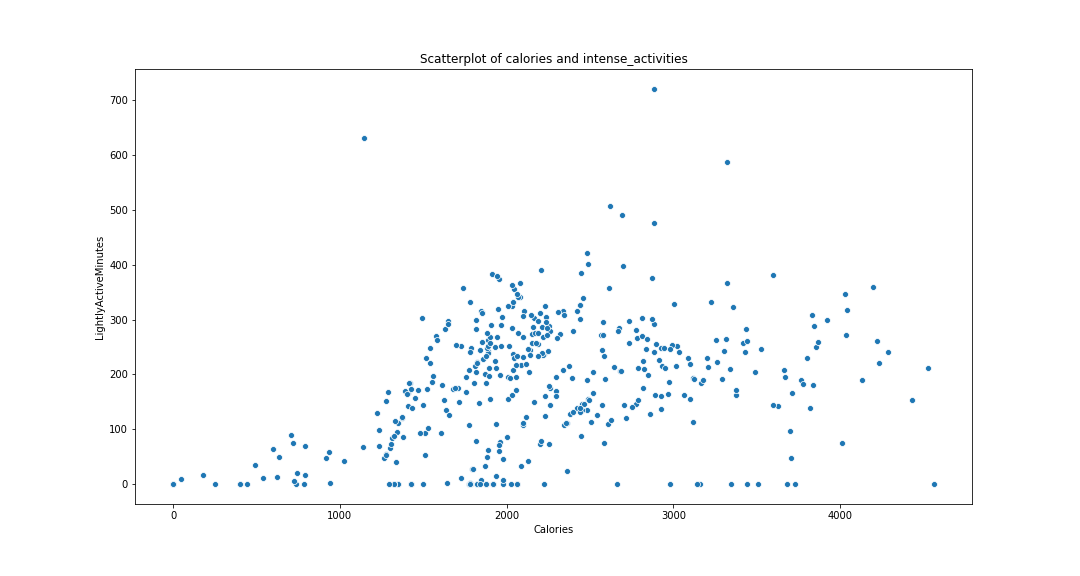

Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

In [44]:
# figure size
plt.figure(figsize=(15,8))

# Simple scatterplot
ax = sns.scatterplot(x='Calories', y='LightlyActiveMinutes', data=data1)

ax.set_title('Scatterplot of calories and intense_activities')

<IPython.core.display.Javascript object>


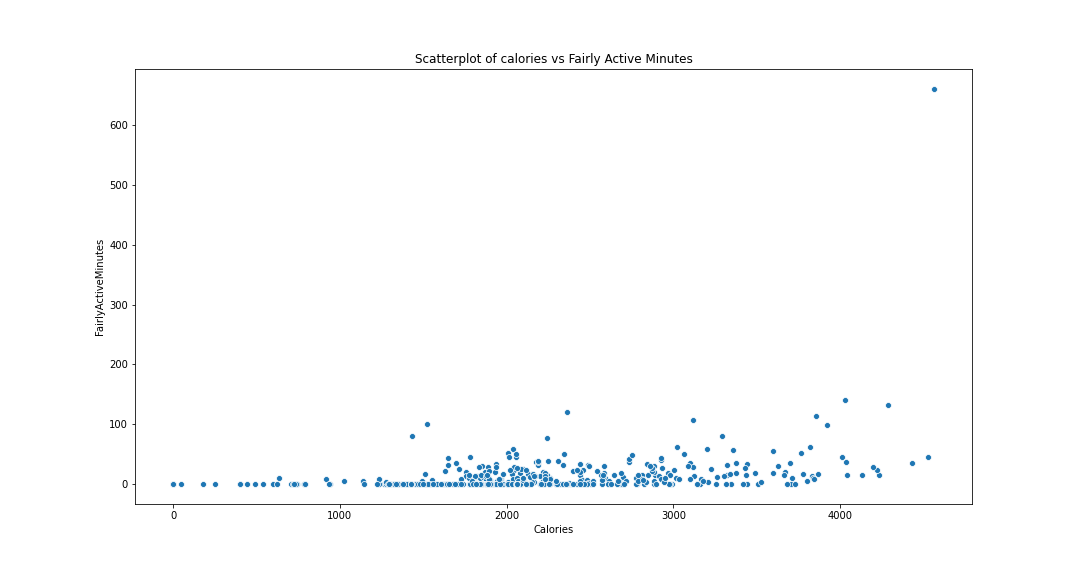

Text(0.5, 1.0, 'Scatterplot of calories vs Fairly Active Minutes')

In [45]:
# figure size
plt.figure(figsize=(15,8))

# Simple scatterplot between calories burnt in the moderately active minutes
ax = sns.scatterplot(x='Calories', y='FairlyActiveMinutes', data=data1)

ax.set_title('Scatterplot of calories vs Fairly Active Minutes')

<IPython.core.display.Javascript object>


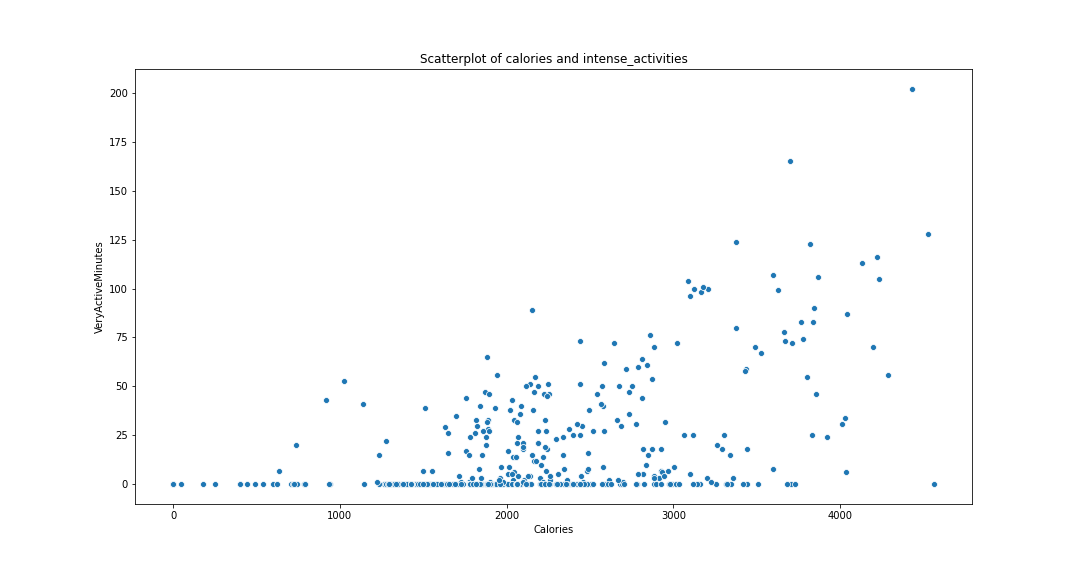

Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

In [46]:
# figure size
plt.figure(figsize=(15,8))

# Simple scatterplot between calories burnt in the intensely active minutes
ax = sns.scatterplot(x='Calories', y='VeryActiveMinutes', data=data1)

ax.set_title('Scatterplot of calories and intense_activities')

In [47]:
data1.head()

,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,year,month,date,Week,Year,day
0,1503960366,2016-03-25,11004,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,2016,3,25,12,2016,Friday
1,1503960366,2016-03-26,17609,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,2016,3,26,12,2016,Saturday
2,1503960366,2016-03-27,12736,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,2016,3,27,12,2016,Sunday
3,1503960366,2016-03-28,13231,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,2016,3,28,13,2016,Monday
4,1503960366,2016-03-29,12041,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,2016,3,29,13,2016,Tuesday


In [48]:
data1 = data1.drop(['Week', 'Year'], axis=1)

In [49]:
data1.head()

,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,year,month,date,day
0,1503960366,2016-03-25,11004,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,2016,3,25,Friday
1,1503960366,2016-03-26,17609,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,2016,3,26,Saturday
2,1503960366,2016-03-27,12736,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,2016,3,27,Sunday
3,1503960366,2016-03-28,13231,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,2016,3,28,Monday
4,1503960366,2016-03-29,12041,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,2016,3,29,Tuesday


In [50]:
data1.shape

(457, 18)

<IPython.core.display.Javascript object>


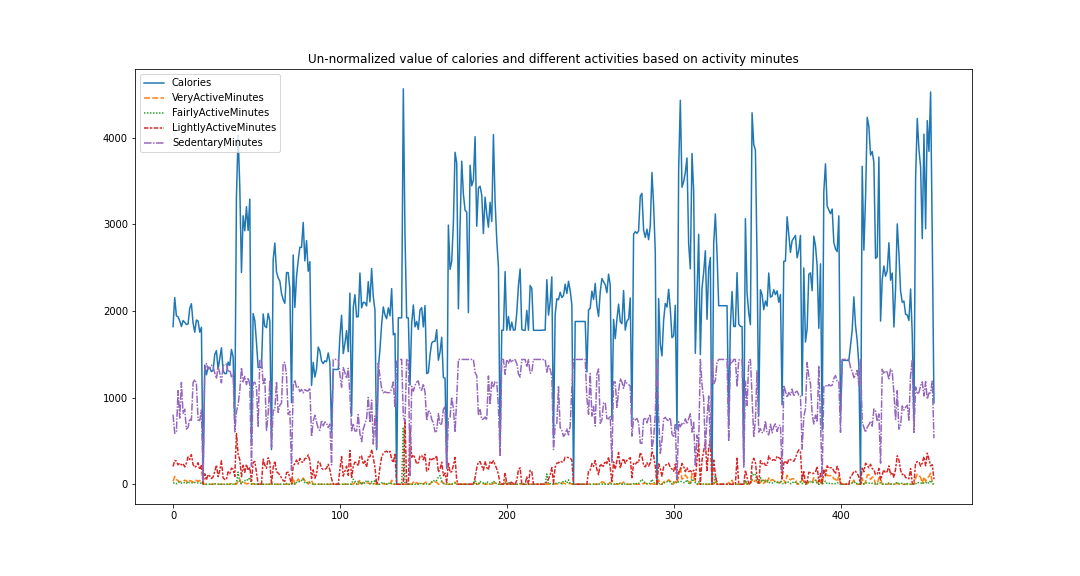

Text(0.5, 1.0, 'Un-normalized value of calories and different activities based on activity minutes')

In [51]:
## plot the raw values 

col_select = ['Calories','VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes']
wide_data = data1[col_select]

# figure size
plt.figure(figsize=(15,8))

# timeseries plot using lineplot
ax = sns.lineplot(data=wide_data)

ax.set_title('Un-normalized value of calories and different activities based on activity minutes')

<IPython.core.display.Javascript object>


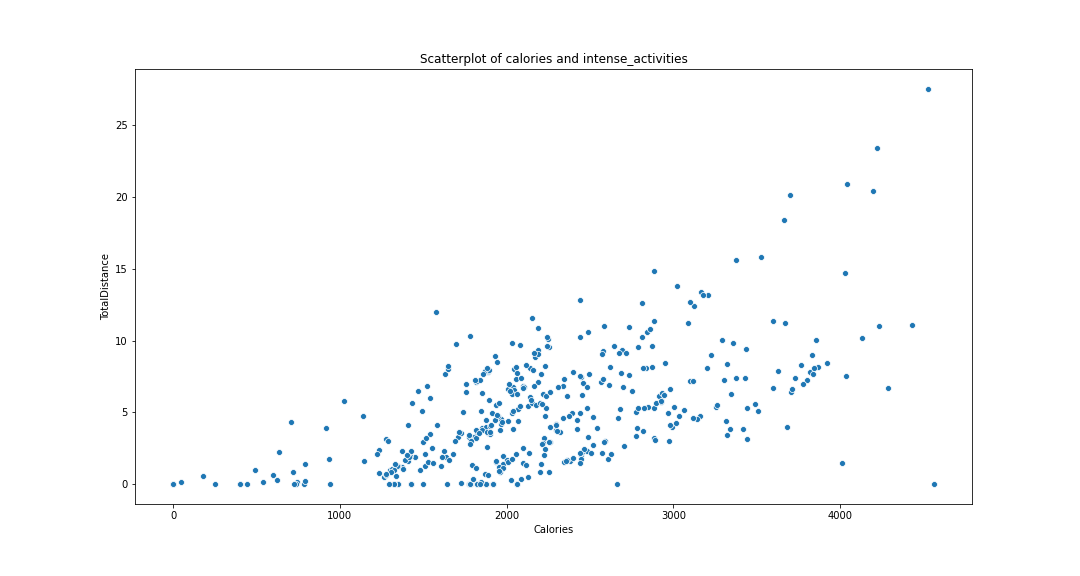

Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

In [52]:
# figure size
plt.figure(figsize=(15,8))

# Simple scatterplot between  calories burnt and total distance covered
ax = sns.scatterplot(x='Calories', y='TotalDistance', data=data1)

ax.set_title('Scatterplot of calories and intense_activities')

<IPython.core.display.Javascript object>


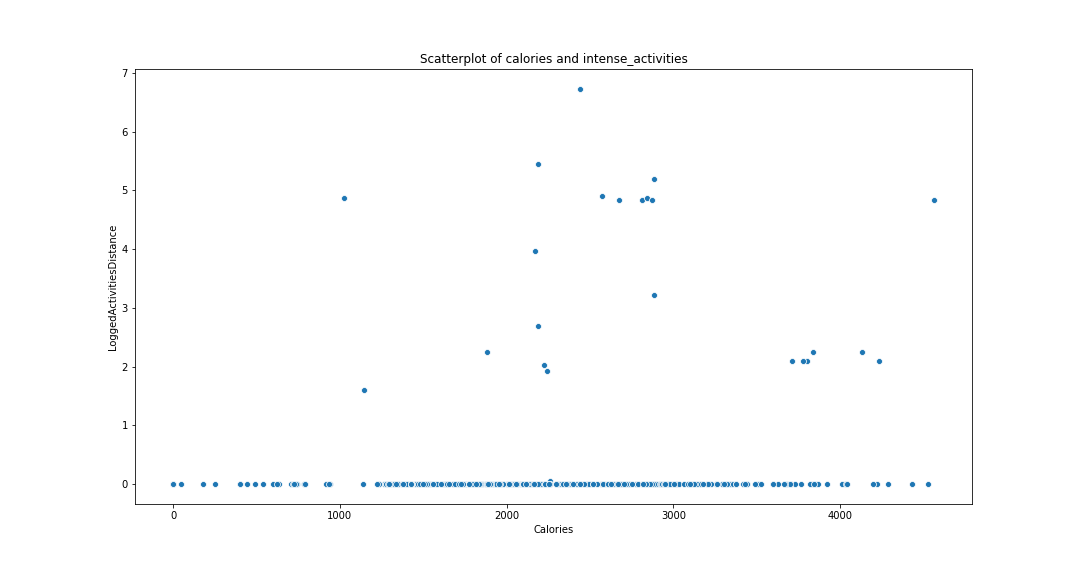

Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

In [53]:
# figure size
plt.figure(figsize=(15,8))

# Simple scatterplot between calories burnt and the loggged activities distance
ax = sns.scatterplot(x='Calories', y='LoggedActivitiesDistance', data=data1)

ax.set_title('Scatterplot of calories and intense_activities')

<IPython.core.display.Javascript object>


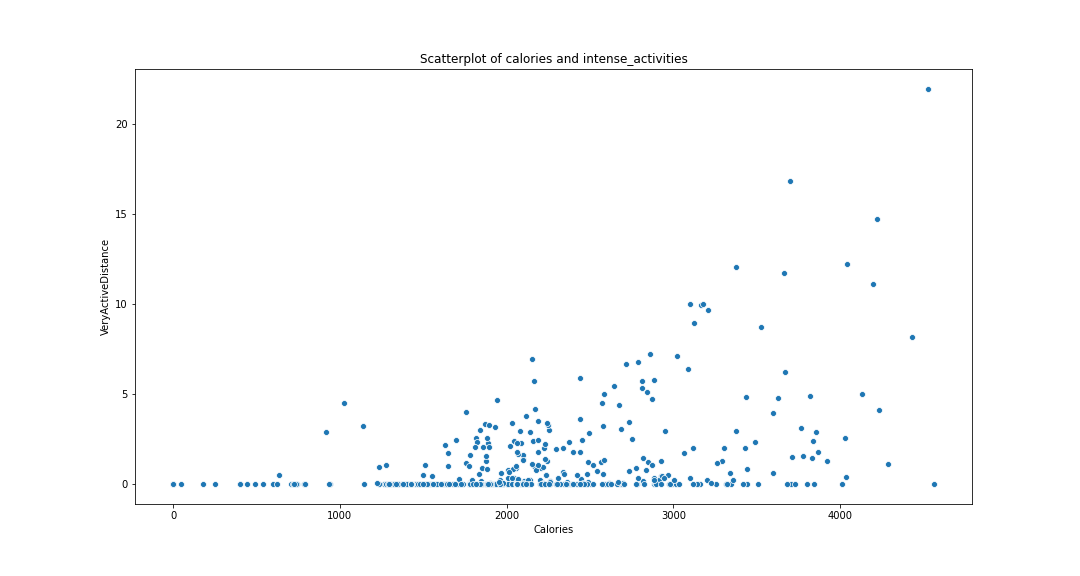

Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

In [54]:
# figure size
plt.figure(figsize=(15,8))

# Simple scatterplot between calories burnt and the distance of intense activies
ax = sns.scatterplot(x='Calories', y='VeryActiveDistance', data=data1)

ax.set_title('Scatterplot of calories and intense_activities')

<IPython.core.display.Javascript object>


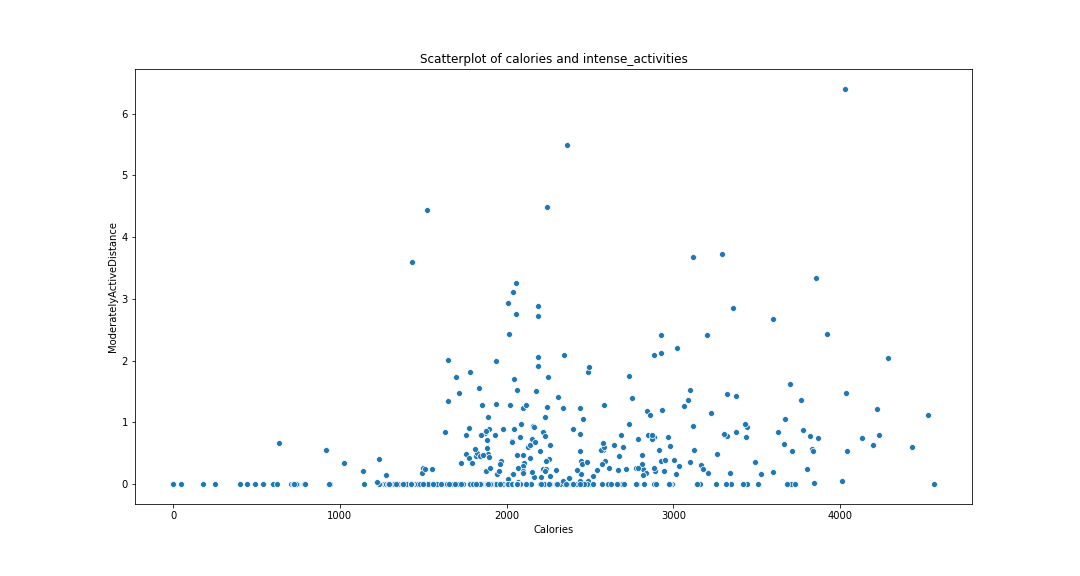

Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

In [55]:
# figure size
plt.figure(figsize=(15,8))

# Simple scatterplot between calories burnt and the distance of moderate activies
ax = sns.scatterplot(x='Calories', y='ModeratelyActiveDistance', data=data1)

ax.set_title('Scatterplot of calories and intense_activities')

<IPython.core.display.Javascript object>


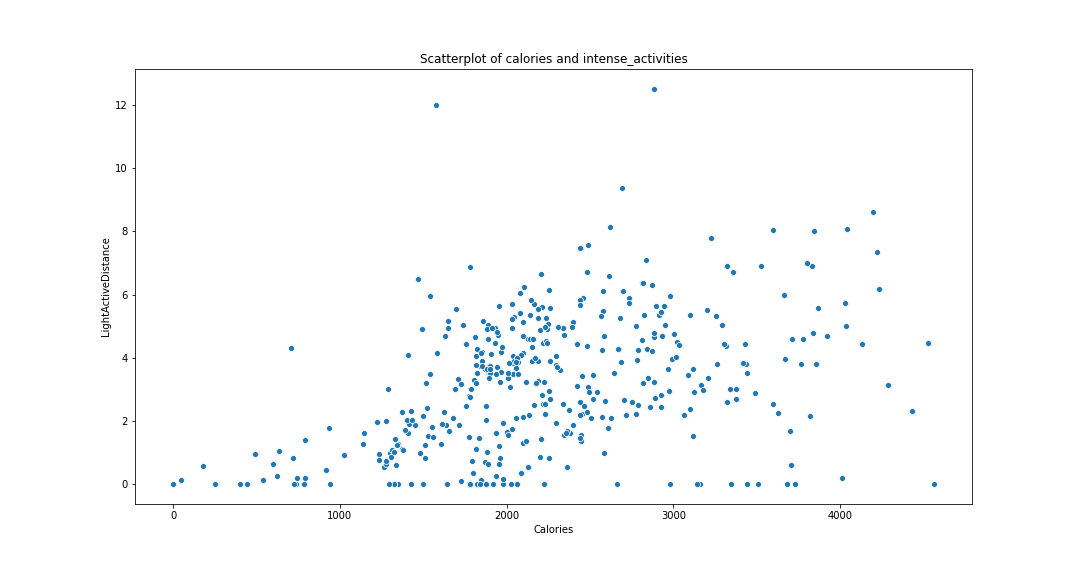

Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

In [56]:
# figure size
plt.figure(figsize=(15,8))

# Simple scatterplot
ax = sns.scatterplot(x='Calories', y='LightActiveDistance', data=data1)

ax.set_title('Scatterplot of calories and intense_activities')

<IPython.core.display.Javascript object>


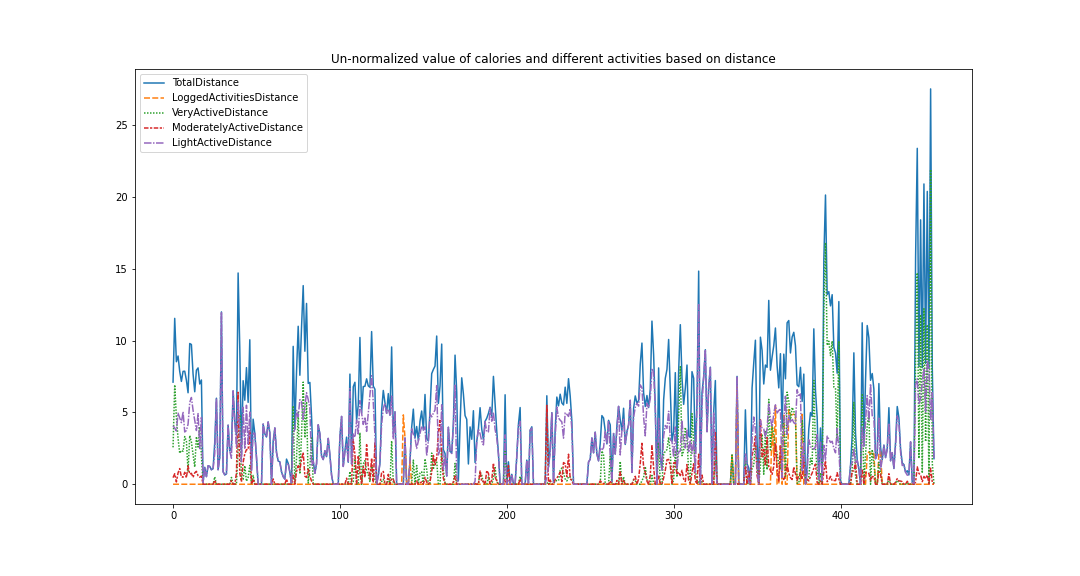

Text(0.5, 1.0, 'Un-normalized value of calories and different activities based on distance')

In [57]:
## plot the raw values 

rol_select = ['TotalDistance','LoggedActivitiesDistance','VeryActiveDistance','ModeratelyActiveDistance', 'LightActiveDistance']
wide_data1 = data1[rol_select]

# figure size
plt.figure(figsize=(15,8))

# timeseries plot using lineplot
ax = sns.lineplot(data=wide_data1)

ax.set_title('Un-normalized value of calories and different activities based on distance')

The  EDA here gives us the insight about the relation between the active hours, the distance for which the user has moderate and intense activity and the calories burnt during that period. 